In [56]:
#LINEAR REGRESSION IMPLEMENTATION (EXPANSION EXPERIMENT)
#Step 1 Importing dependencies
import numpy as np
import matplotlib.pyplot as plt


In [57]:
#Step 2 Define the function for calculating gradients
def generate_gradient(X, theta, y):
    sample_count = X.shape[0]
    # Calculate the gradient based on the matrix 1/m ∑(((h(x^i)-y^i)) x_j^i)
    return (1./sample_count)*X.T.dot(X.dot(theta)-y)

In [58]:
#Step 3 Define the function for reading datasets.
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path,skiprows=1) # Ignore the title in the first row of the dataset.
    cols = orig_data.shape[1]
    return (orig_data, orig_data[:, :cols - 1], orig_data[:, cols-1:])

In [61]:
#Step 4 Define the function for initializing parameters
# Initialize the θ array.
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count, 1)

In [62]:
#STEP 5 DEFINE THE FUNCTION FOR IMPLEMENTING GRADIENT DESCENT
def gradient_descending(X, y, theta, alpha):
    Jthetas= [] # Record the change trend of the cost function J(θ) to confirm the gradient descent is correct.
    # Calculate the loss function, which is equal to the square of the difference between the actual value and the predicted value: (y^i-h(x^i))^2
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
    index = 0
    gradient = generate_gradient(X, theta, y) # Calculate the gradient.
    while not np.all(np.absolute(gradient) <= 1e-5): # End the calculation when the gradient is less than 0.00001.
        theta = theta - alpha * gradient
        gradient = generate_gradient(X, theta, y) # Calculate the new gradient.
        # Calculate the loss function, which is equal to the square of the difference between the actual value and the predicted value: (y^i-h(x^i))^2
        Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
        if (index+1) % 10 == 0:
            Jthetas.append((index, Jtheta[0])) # Record the result every 10 calculations.
        index += 1
    return theta,Jthetas
    

In [63]:
#Step 6 DEFINE THE FUNCTION FOR VISUALIZING THE CHANDE CURVE OF THE LOSS FUNCTION.
# Plot the loss function change curve.
def showJTheta(diff_value):
    p_x = []
    p_y = []
    for (index, sum) in diff_value:
        p_x.append(index)
        p_y.append(sum)
    plt.plot(p_x, p_y, color='b')
    plt.xlabel('steps')
    plt.ylabel('loss funtion')
    plt.title('step - loss function curve')
    plt.show()


In [64]:
#Step 7 DEFINE THE FUNCTION FOR VISUALIZING DATA POINTS AND THE FITTED CURVE.
# Plot the actual data points and the fitted curve.
def showlinercurve(theta, sample_training_set):
    x, y = sample_training_set[:, 1], sample_training_set[:, 2]
    z = theta[0] + theta[1] * x
    plt.scatter(x, y, color='b', marker='x',label="sample data")
    plt.plot(x, z, 'r', color="r",label="regression curve")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('liner regression curve')
    plt.legend()
    plt.show()

w:3.0076279423997594 b:1.668677412281192


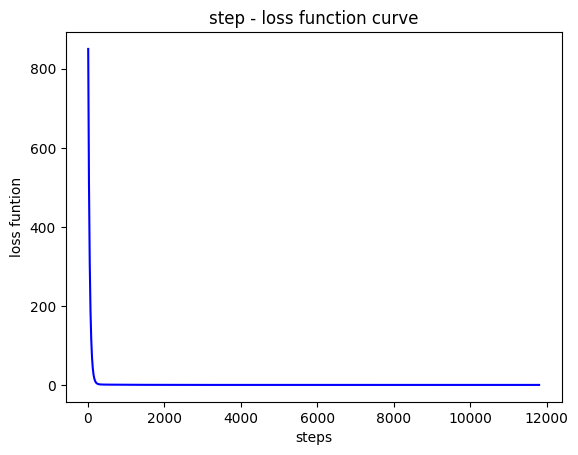

C:\Users\breez\AppData\Local\Temp\ipykernel_10924\3891920189.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, z, 'r', color="r",label="regression curve")


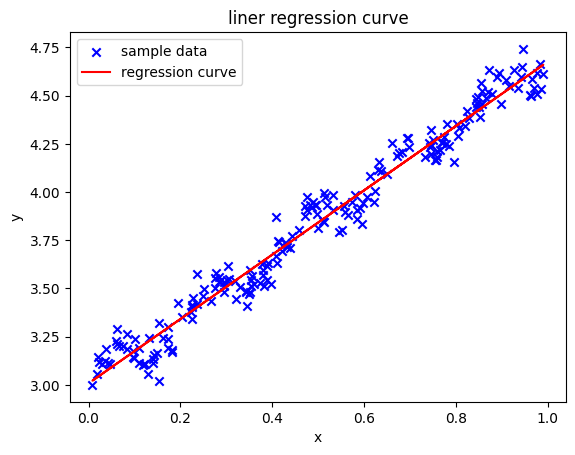

In [65]:
# Read the dataset.
training_data_include_y, training_x, y = get_training_data("lr2_data.txt")
# Obtain the numbers of samples and features, respectively.
sample_count, feature_count = training_x.shape
# Define the learning step α.
alpha = 0.01
# Initialize θ.
theta = init_theta(feature_count)
# Obtain the final parameter θ and cost.
result_theta,Jthetas = gradient_descending(training_x, y, theta, alpha)
# Display the parameter.
print("w:{}".format(result_theta[0][0]),"b:{}".format(result_theta[1][0]))
showJTheta(Jthetas)
showlinercurve(result_theta, training_data_include_y)